## Exploratory Data Analysys: Cars: Statistics, Visualization
- , car price 450 000 -1m

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [55]:
df = pd.read_csv('cleaned_avito_cars_450-1m.csv')
df =df.drop(['Unnamed: 0'], axis =1)
df.head(2)

,car,year,price,mileage,hp,vol,box,body,drive,fuel,location,inform,date,today,url
0,Mitsubishi Lancer,2014,650000,100181,140,1.8,CVT,sedan,front_wheel,gasoline,Москва,Прoдаю надёжный автомобиль в достойнойном тeхн...,Несколько секунд назад,2021-11-23,https://www.avito.ru//moskva/avtomobili/mitsub...
1,Mazda 3,2008,490000,213000,105,1.6,MT,sedan,front_wheel,gasoline,"Свердловская область, Екатеринбург","По кузову имеется один окрас, остальное все в ...",Несколько секунд назад,2021-11-23,https://www.avito.ru//ekaterinburg/avtomobili/...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656 entries, 0 to 5655
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car       5656 non-null   object 
 1   year      5656 non-null   int64  
 2   price     5656 non-null   int64  
 3   mileage   5656 non-null   int64  
 4   hp        5656 non-null   int64  
 5   vol       5642 non-null   float64
 6   box       5656 non-null   object 
 7   body      5656 non-null   object 
 8   drive     5656 non-null   object 
 9   fuel      5656 non-null   object 
 10  location  5656 non-null   object 
 11  inform    5047 non-null   object 
 12  date      5656 non-null   object 
 13  today     5656 non-null   object 
 14  url       5656 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 662.9+ KB


# PART 1: DESCRIPTIVE STATISTICS

## DISCRETE VARIABLES
- Car, Gear_box, drive,fuel,body, cities etc
- Discrete data takes the form of a finite set of data while continuous data takes the form of an infinite set of data.

### Q1: most popular cars with year (mode) price and mileage statistics

In [56]:
## sort_values by usually takes by =['colname']
## indexing is used for multi-level columns

grpd = df.groupby('car').agg({'car':['count'], 
                        'year':[pd.Series.mode, 'min', 'max'],
                        'mileage' : ['mean', 'min','max'], 
     'price' : ['mean','median', 'min', 'max']})

grpd.sort_values(by = [grpd.columns[0]],ascending = False).head(15)

car          year                    mileage         \
                  count          mode   min   max           mean    min   
car                                                                       
Hyundai Solaris     294          2014  2011  2021  118608.629252     13   
Kia Rio             215          2015  2009  2021  115253.600000     89   
Volkswagen Polo     183          2016  2010  2021  125445.535519    314   
Ford Focus          179          2012  2006  2018  143038.206704  19000   
LADA Granta         146          2020  2013  2021   44114.979452      1   
Skoda Octavia       136          2013  2007  2019  158794.139706  61000   
LADA Vesta          114          2017  2015  2021   70576.938596      4   
Kia Ceed            105          2013  2007  2021  139130.057143     30   
Renault Duster       91          2014  2012  2021  107530.252747    158   
Opel Astra           87          2011  2007  2016  144358.333333  48300   
Renault Logan        74          2017  2010  2021   86675.324324     47   
ВАЗ (LADA) Vesta     71  [2017, 2019]  2016  2021   64769.070423      1   
Toyota Corolla       68          2008  2004  2014  175433.691176  83000   
ВАЗ (LADA) Granta    66          2019  2016  2021   46693.333333      1   
Chevrolet Cruze      64          2012  2009  2015  140498.015625  27100   

                                   price                             
                      max           mean    median     min      max  
car                                                                  
Hyundai Solaris    317000  701655.506803  679995.0  460000  1000000  
Kia Rio            364546  720454.255814  725000.0  465000  1000000  
Volkswagen Polo    300000  702122.710383  688000.0  459000  1000000  
Ford Focus         370000  618440.201117  610000.0  450000  1000000  
LADA Granta        145000  624695.561644  635000.0  450000   970000  
Skoda Octavia      437000  716636.022059  710000.0  450000  1000000  
LADA Vesta         186000  749210.429825  735000.0  487000   998000  
Kia Ceed           352073  733184.542857  743000.0  460000   995500  
Renault Duster     196560  792251.626374  795000.0  475000   999000  
Opel Astra         235391  601595.390805  580000.0  450000   999000  
Renault Logan      280000  628856.135135  599000.0  450000   950000  
ВАЗ (LADA) Vesta   235000  785645.943662  800000.0  480000   988000  
Toyota Corolla     445000  693454.220588  635000.0  456999  1000000  
ВАЗ (LADA) Granta  147500  623003.454545  607400.0  469000   892500  
Chevrolet Cruze    237000  599056.859375  582500.0  450000   850000

### Q2: most popular body, fuel, gear box, drive

In [57]:
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
#sns.set_theme(style="ticks", color_codes=True)

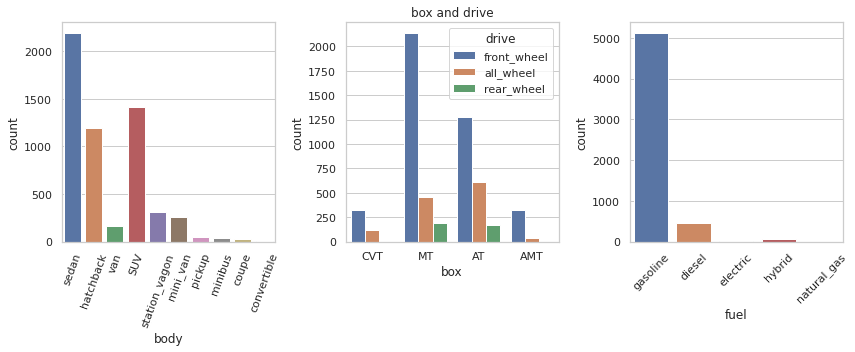

In [58]:
figure, axes = plt.subplots(1, 3, figsize=(12,5))

plt.subplot(1,3,1)
ax = sns.countplot(x='body',data=df)
plt.xticks(rotation= 70)

plt.subplot(1,3,2)
ax = sns.countplot(x='box', hue='drive', data=df)
plt.title("box and drive")

plt.subplot(1,3,3)
ax = sns.countplot(x='fuel',data=df)
plt.xticks(rotation= 45)

plt.tight_layout()
plt.show()

In [7]:
df.body.value_counts()

 седан           2194
 внедорожник     1411
 хетчбэк         1189
 универсал        315
 минивэн          259
 фургон           168
 пикап             51
 микроавтобус      40
 купе              24
 кабриолет          5
Name: body, dtype: int64

In [8]:
df.fuel.value_counts()

 бензин     5124
 дизель      462
 гибрид       58
 электро       9
 газ           3
Name: fuel, dtype: int64

### Q3: Statistics by Cities: Mileage Price

### Q3.1  : Extract City Names from Location
- PROTOTYPE, Split df.location to extract City names
- Here, only City will be extracted, other columns 1,2,3 Contain info on 'область', 'край', 'Республика'
- 5- len(x), 5 (try also 1,2,3) pushes rows with just one ',' Delimiter
- to the rightmost column, creating just one entry
- This Maximizes number of cities, villages and towns in one column

In [59]:
cities = pd.DataFrame(df.location.copy().apply(lambda x: str(x).split(','))
                 .apply(lambda x: [np.nan]*(5-len(x)) + x).to_list()).copy()
cities.head(2)

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,Москва
1,NaN,NaN,NaN,Свердловская область,Екатеринбург


In [11]:
d = df.location.copy().apply(lambda x: str(x).split(','))
d

0                                                [Москва]
1                   [Свердловская область,  Екатеринбург]
2                   [Свердловская область,  Екатеринбург]
3       [Приморский край,  Владивостокский г.о.,  Влад...
4                      [Астраханская область,  Астрахань]
                              ...                        
5651                    [Ярославская область,  Ярославль]
5652                                             [Москва]
5653                            [Курская область,  Льгов]
5654                     [Удмуртская Республика,  Ижевск]
5655                         [Самарская область,  Самара]
Name: location, Length: 5656, dtype: object

In [60]:
d.apply(lambda x: [np.nan]*(5-len(x))).to_list()

[[nan, nan, nan, nan],
 [nan, nan, nan],
 [nan, nan, nan],
 [nan, nan],
 [nan, nan, nan],
 [nan, nan],
 [nan, nan, nan],
 [nan, nan, nan, nan],
 [nan, nan, nan],
 [nan, nan, nan],
 [nan, nan, nan],
 [nan, nan, nan, nan],
 [nan, nan, nan, nan],
 [nan, nan],
 [nan, nan, nan, nan],
 [nan, nan, nan],
 [nan, nan, nan],
 [nan, nan, nan],
 [nan, nan],
 [nan, nan, nan],
 [nan, nan, nan],
 [nan, nan],
 [nan, nan, nan],
 [nan, nan, nan],
 [nan, nan, nan],
 [nan, nan, nan, nan],
 [nan, nan, nan, nan],
 [nan],
 [nan, nan, nan, nan],
 [nan, nan, nan, nan],
 [nan, nan, nan, nan],
 [nan, nan, nan, nan],
 [nan, nan],
 [nan, nan, nan],
 [nan, nan, nan],
 [nan, nan, nan],
 [nan, nan],
 [nan, nan, nan],
 [nan],
 [nan, nan],
 [nan, nan],
 [nan, nan, nan, nan],
 [nan, nan, nan],
 [nan, nan, nan],
 [nan, nan, nan],
 [nan, nan, nan],
 [nan, nan, nan],
 [nan, nan],
 [nan, nan, nan, nan],
 [nan, nan, nan],
 [nan, nan, nan, nan],
 [nan, nan, nan],
 [nan, nan],
 [nan, nan, nan],
 [nan, nan, nan, nan],
 [nan, nan

In [12]:
d.apply(lambda x: [np.nan]*(5-len(x)) + x).to_list()

[[nan, nan, nan, nan, 'Москва'],
 [nan, nan, nan, 'Свердловская область', ' Екатеринбург'],
 [nan, nan, nan, 'Свердловская область', ' Екатеринбург'],
 [nan, nan, 'Приморский край', ' Владивостокский г.о.', ' Владивосток'],
 [nan, nan, nan, 'Астраханская область', ' Астрахань'],
 [nan, nan, 'Московская область', ' г.о. Мытищи', ' пос. Птицефабрики'],
 [nan, nan, nan, 'Ставропольский край', ' Пятигорск'],
 [nan, nan, nan, nan, 'Москва'],
 [nan, nan, nan, 'Кировская область', ' Киров'],
 [nan, nan, nan, 'Краснодарский край', ' Краснодар'],
 [nan, nan, nan, 'Астраханская область', ' Астрахань'],
 [nan, nan, nan, nan, 'Санкт-Петербург'],
 [nan, nan, nan, nan, 'Москва'],
 [nan, nan, 'Приморский край', ' Владивостокский г.о.', ' Владивосток'],
 [nan, nan, nan, nan, 'Санкт-Петербург'],
 [nan, nan, nan, 'Чувашская Республика', ' Канаш'],
 [nan, nan, nan, 'Пермский край', ' Пермь'],
 [nan, nan, nan, 'Челябинская область', ' Магнитогорск'],
 [nan, nan, 'Республика Татарстан', ' Нижнекамский р-н'

#### create a city column in df

In [61]:
df['city'] = cities.loc[:, 4].copy()
df=df[['car','year','price','mileage','hp','vol',
       'box','body','drive','fuel','city','location', 'inform','date','today','url']]

In [63]:
#df.city.unique()

In [14]:
df[df.city.str.contains('Ека') == True].head(1)

,car,year,price,mileage,hp,vol,box,body,drive,fuel,city,location,inform,date,today,url
1,Mazda 3,2008,490000,213000,105,1.6,MT,седан,передний,бензин,Екатеринбург,"Свердловская область, Екатеринбург","По кузову имеется один окрас, остальное все в ...",Несколько секунд назад,2021-11-23,https://www.avito.ru//ekaterinburg/avtomobili/...


In [64]:
## Get City stats
city_stats1 = df.groupby('city').agg({'car':['count'], 
                        'year':[pd.Series.mode, 'min', 'max'],
                        'mileage' : ['mean', 'min','max'], 
     'price' : ['mean','median', 'min', 'max']})

city_stats1.sort_values(by = [city_stats1.columns[0]],ascending = False).head(15)

car                year                    mileage         \
                 count                mode   min   max           mean    min   
city                                                                           
Москва             916                2012  1992  2021  131786.872271      3   
Санкт-Петербург    244                2012  1993  2021  144341.479508   1300   
 Краснодар         182                2012  1952  2020  158396.307692   5000   
 Владивосток       133                2018  1994  2020   57953.383459   9000   
 Казань            132                2013  2001  2021  132089.893939   1800   
 Ростов-на-Дону    119                2011  1997  2020  147501.823529  11126   
 Екатеринбург       98                2011  2001  2021  133884.632653    167   
 Челябинск          97                2011  1999  2020  146086.030928   6170   
 Уфа                96                2014  1981  2020  138776.343750   7297   
 Воронеж            87        [2013, 2017]  2001  2020  122893.022989  19000   
 Самара             79                2017  1997  2021  113332.696203   5500   
 Ижевск             78                2013  2000  2021  122133.179487  12000   
 Пермь              78                2012  2006  2020  140746.794872  13000   
 Нижний Новгород    73  [2008, 2010, 2014]  2004  2019  136411.794521  10660   
 Волгоград          61                2012  2003  2021  130001.032787    300   

                                  price                             
                     max           mean    median     min      max  
city                                                                
Москва            791000  716040.889738  710000.0  450000  1000000  
Санкт-Петербург   437000  714450.811475  711000.0  455000  1000000  
 Краснодар        440000  684057.989011  679500.0  450000  1000000  
 Владивосток      190000  723276.240602  720000.0  450000  1000000  
 Казань           349000  674293.651515  645000.0  450000   999000  
 Ростов-на-Дону   370000  691908.386555  669000.0  450000   999999  
 Екатеринбург     390000  717931.428571  710000.0  450000   999000  
 Челябинск        600000  678429.896907  645000.0  450000   999000  
 Уфа              482650  714510.822917  677495.0  450000   999000  
 Воронеж          323000  718313.793103  725000.0  450000   997000  
 Самара           391000  657727.177215  640000.0  450000   995000  
 Ижевск           370000  717935.474359  719500.0  450000   999000  
 Пермь            560000  688169.871795  668495.0  480000   990000  
 Нижний Новгород  340323  708232.287671  720000.0  450000   999999  
 Волгоград        500000  646914.754098  638000.0  455000   955000

### Q4: Stats by Cities : most common body, drive, fuel, and gear_box 

In [65]:
## Most common gear box type
city_stats2 = df.groupby('city').agg({'car':['count'], 
                        'box':[pd.Series.mode],
                        'drive' : [pd.Series.mode], 
     'fuel' : [pd.Series.mode]})
city_stats2.sort_values(by = [city_stats2.columns[0]],ascending = False).head(15)

,car,box,drive,fuel
,count,mode,mode,mode
city,,,,
Москва,916,AT,front_wheel,gasoline
Санкт-Петербург,244,MT,front_wheel,gasoline
Краснодар,182,AT,front_wheel,gasoline
Владивосток,133,CVT,front_wheel,gasoline
Казань,132,MT,front_wheel,gasoline
Ростов-на-Дону,119,MT,front_wheel,gasoline
Екатеринбург,98,MT,front_wheel,gasoline
Челябинск,97,MT,front_wheel,gasoline


### Q4.1:  Zoom in

In [17]:
## 'car' column added for the count, 
## here it conts gear box
city_stats3 = df[['city','box', 'car']].groupby(['city', 'box']).count()
city_stats3.reset_index(inplace = True)
city_stats3.rename(columns={'car':'box_count'}, inplace=True)
city_stats3.head(5)

,city,box,box_count
0,Абакан,AT,2
1,Абакан,MT,2
2,Абинск,AT,9
3,Абинск,MT,1
4,Азнакаево,MT,1


In [18]:
city_stats3[city_stats3.city.str.contains('Санкт-Петербург')]

,city,box,box_count
1072,Санкт-Петербург,AMT,34
1073,Санкт-Петербург,AT,83
1074,Санкт-Петербург,CVT,17
1075,Санкт-Петербург,MT,110


## CONTINUOUS VARIABLES: Normality Check, DIstribution, Outliers 
- Do wee need a normal distribution for sample sizes this big? (5600)?
- The central limit theorem (CLT) states that the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution
- Do initial condition matter when sampling? Our cars are all used, 450000 -1m

In [19]:
# continous variables
df[['price','mileage']].describe()

,price,mileage
count,5656.000000,5656.000000
mean,696539.233911,137306.148161
std,155618.216508,84263.716593
min,450000.000000,1.000000
25%,565000.000000,82000.000000
50%,685000.000000,130506.000000
75%,819000.000000,179000.000000
max,1000000.000000,960000.000000


### HISTOGRAMS 
- NORMAL DISTRIBUTION - Symmetric around the mean, Mean, median, mode are equal : Empirical rule: 68/95/99.7 
- A histogram is a plot that involves first grouping the observations into bins and counting the number of events that fall into each bin. 
- The counts, or frequencies of observations, in each bin are then plotted as a bar graph with the bins on the x-axis and the frequency on the y-axis.
- COUNT column CHANGES in hist and dist plots depending on BIN WIDTH :The choice of the number of bins is important as it controls the coarseness of the distribution (number of bars) and, in turn, how well the density of the observations is plotted. 
- All frequencies (counts) summed equals the number of observations. 
- More on histograms from khan academ (with exercises) https://www.khanacademy.org/math/statistics-probability/displaying-describing-data/quantitative-data-graphs/v/histograms
- Histograms and Density Plots in Python https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

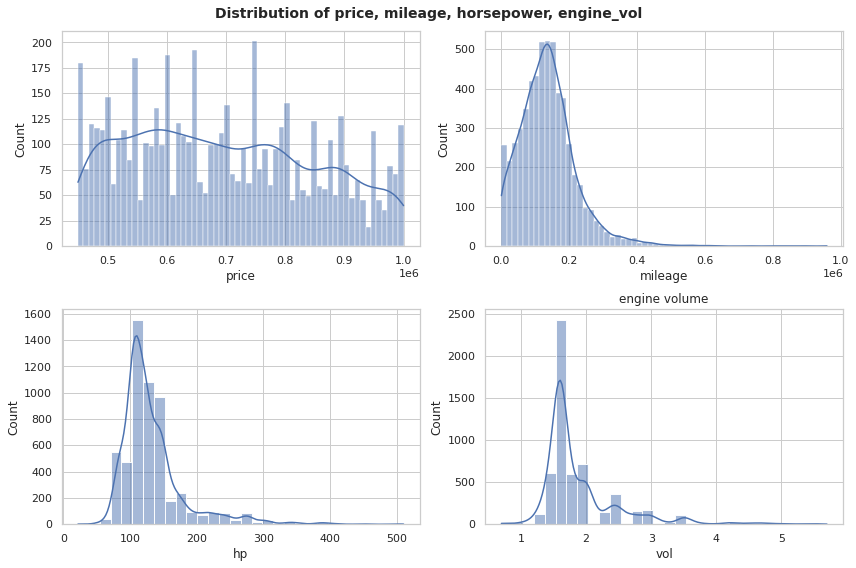

In [66]:
figure, axes = plt.subplots(2, 2, figsize=(12,8))

sns.histplot(df.price, kde=True, bins = 60, ax=axes[0,0])
sns.histplot(df.mileage, kde=True, bins = 60, ax=axes[0,1])
sns.histplot(df.hp, kde=True, bins = 30, ax=axes[1,0])
sns.histplot(df.vol, kde=True, bins = 30, ax=axes[1,1]).set(title= 'engine volume')

figure.suptitle('Distribution of price, mileage, horsepower, engine_vol', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### HISTOGRAM vs PDF 
- PDF is the plot a histogram of the data sample and an  OVERLAY of a  LINE PLOT OF THE PROBABILITIES (PDF) calculated for the range of values from the Probability Density Function (which is a proxy for the probability of having a certain value).
- The area under the PDF sums to 1
- CONTRAST: We use the empirical distribution (i.e. the histogram) if we want to describe our sample, and the PDF to describe the hypothesized underlying distribution.
- CONTRAST: Here we  convert the counts  in each bin of the histogram to a normalized probability (see y axis) so that each bar’s height shows a probability. 
- For a PDF, probability is obtained by calculating the integral over a range of values

- Histograms vs. KDEs Explained https://towardsdatascience.com/histograms-vs-kdes-explained-ed62e7753f12
- best giude for difference PDF, PMF and Histogram : https://towardsdatascience.com/quantiles-key-to-probability-distributions-ce1786d479a9

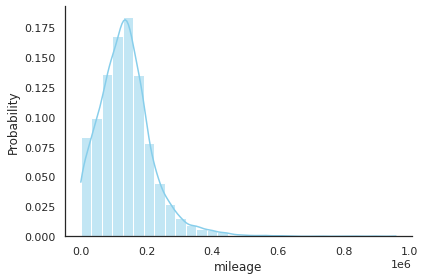

In [67]:
# KDE - Kernel Density Estimation
sns.set_style("white")
g = sns.displot(df.mileage, bins=30, kde=True, height =4, aspect=1.5/1,
            stat = "probability", color='skyblue')
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.show()

### Distribution: Different Sample Scenarious

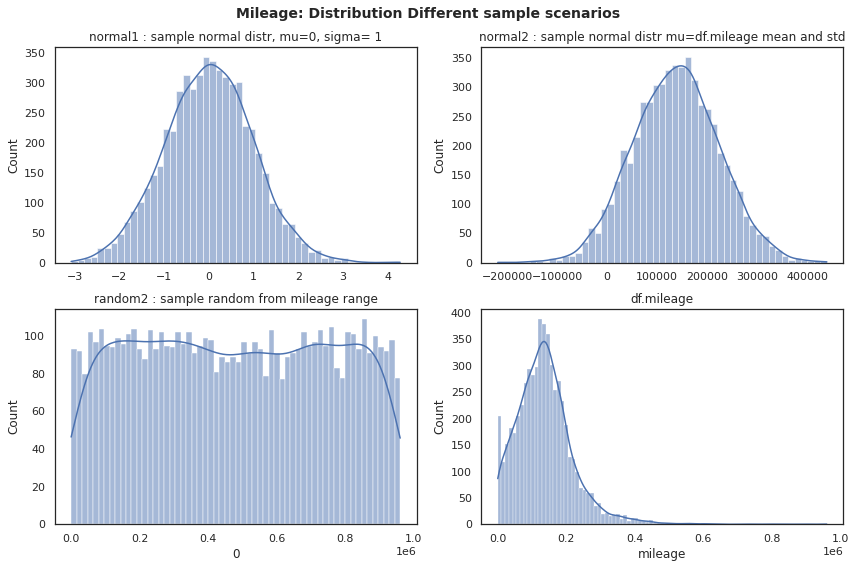

In [75]:
##  generate synthetic data, normal distribution
from random import randrange, uniform
import random
import numpy as np
import numpy

mu1, sigma1 = 0, 1
normal1 = numpy.random.normal(mu1, sigma1, 5656)
normal2 = numpy.random.normal(df.mileage.mean(), df.mileage.std(), 5656)

## generate random, NOT from normal distibution
random1 = pd.DataFrame ([uniform(df.mileage.min(), df.mileage.max()) for p in range(0, 5657)])
random2 = pd.DataFrame(random.sample(range(df.mileage.min(), df.mileage.max()), 5656))

### PLOT
figure, axes = plt.subplots(2, 2, figsize=(12,8))

#sns.histplot([normal1, normal2], kde=True , ax=axes[0,0]).set(title='sample normal distribution')
sns.histplot(normal1, kde=True , ax=axes[0,0]).set(title='normal1 : sample normal distr, mu=0, sigma= 1')
sns.histplot(normal2, kde=True , ax=axes[0,1]).set(title='normal2 : sample normal distr mu=df.mileage mean and std')
sns.histplot(random2.loc[:, 0], bins = 60, kde=True , ax=axes[1,0]).set(title='random2 : sample random from mileage range')
sns.histplot(df.mileage, kde=True , ax=axes[1,1]).set(title='df.mileage')

figure.suptitle('Mileage: Distribution Different sample scenarios', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

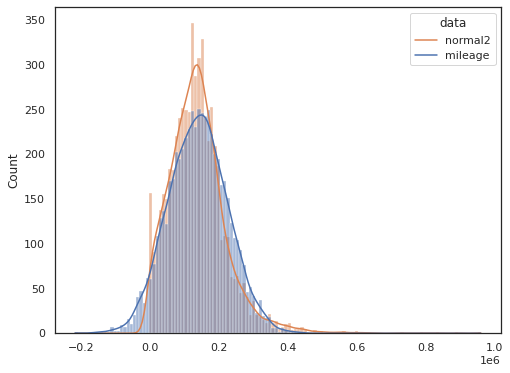

In [85]:
plt.figure(figsize = (8,6))
gfg = sns.histplot([normal2, df.mileage], kde=True )
#gfg.set_ylim(0, 600)

plt.legend(title='data', loc='upper right', labels=['normal2','mileage'])
plt.show()

### Normality Check: Shapiro - Wilk tests  
- The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.
- p <= alpha (0.05): reject H0: Distribution is not normal
- p > alpha: fail to reject H0: Distribution is normal
- Shapiro test: CONCLUSION for samples as big as 5000 Normality test is USELESS
- LIMITATION sample sizes of this order, or even larger, such tests are arguably fairly useless as even minute deviations from normality will qualify as significant at conventional levels.
- more on limitations : https://stats.stackexchange.com/questions/446262/can-a-sample-larger-than-5-000-data-points-be-tested-for-normality-using-shapiro
- https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93
- https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

In [86]:
#skewness = 0 : normally distributed.
#skewness > 0 : more weight in the left tail of the distribution.
#skewness < 0 : more weight in the right tail of the distribution.

# warnings.warn("p-value may not be accurate for N > 5000.")
W, p = stats.shapiro(df.mileage)
W1, p1 = stats.shapiro(normal1)
W2, p2 = stats.shapiro(normal2)
W3, p3 = stats.shapiro(random2)
p_values = pd.DataFrame.from_dict({'df.mileage' :[p, stats.skew(df.mileage)], 
            'sample normal':[p1, stats.skew(normal1)],
            'sample normal from mileage range': [p2,stats.skew(normal2)],
            'sample random from mileage range':[p3, stats.skew(random2)]
           })
p_values.rename(index={0: 'p value', 1:'skew'}, inplace = True)
p_values

/home/turturo/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,df.mileage,sample normal,sample normal from mileage range,sample random from mileage range
p value,0.000000,0.061531,0.857753,0.0
skew,1.495174,0.031691,0.011933,[0.015024963307377126]


### Normality check (Visual): QQ Plot 
- QQ - The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential. For example, if we run a statistical analysis that assumes our dependent variable (mileage) is Normally distributed, we can use a Normal Q-Q plot to check that assumption. It’s just a visual check, not an air-tight proof, so it is somewhat subjective.
- We are testing if the distribution of mileage is normally distributed. We are comparing the quantiles of mileage vs quantile from a normally distributed curve. If two quantiles are sampled from the same distribution, they should roughly fall in a straight line.
-  what are “quantiles”? These are often referred to as “percentiles”. These are points in your data below which a certain proportion of your data fall. For example, imagine the classic bell-curve standard Normal distribution with a mean of 0. The 0.5 quantile, or 50th percentile, is 0. Half the data lie below 0. That’s the peak of the hump in the curve. The 0.95 quantile, or 95th percentile, is about 1.64. 95 percent of the data lie below 1.64.
- Usually, the z-scores are in the x-axis (also called theoretical quantiles since we are using this as a base for comparison) and the variable quantiles are in the y-axis (also called ordered values)
- https://data.library.virginia.edu/understanding-q-q-plots/
- https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93
- https://towardsdatascience.com/significance-of-q-q-plots-6f0c6e31c626

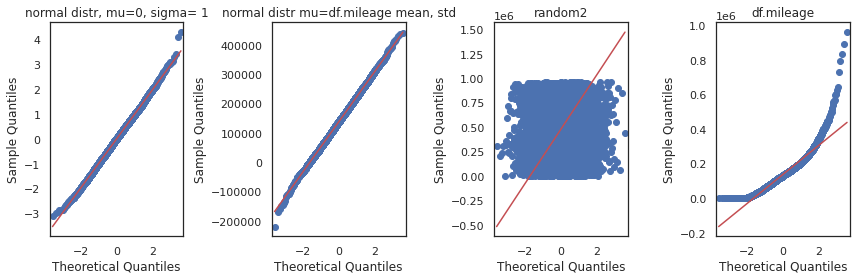

In [90]:
import statsmodels.api as sm

plt.figure(figsize=(12,4))

ax1 = plt.subplot(1,4,1)
sm.qqplot(normal1, line='s', ax = ax1)
plt.title('normal distr, mu=0, sigma= 1')
ax2 = plt.subplot(1,4,2)
sm.qqplot(normal2, line='s', ax = ax2);
plt.title('normal distr mu=df.mileage mean, std')
ax3 = plt.subplot(1,4,3)
sm.qqplot(random2, line='s', ax = ax3);
plt.title('random2')
ax4 = plt.subplot(1,4,4)
sm.qqplot(df.mileage, line='s', ax = ax4);
plt.title('df.mileage')
plt.tight_layout()
plt.show()

# PART 2 : INFERRENTIAL STATISTICS

### Q5: Outliers: Identify cars with 'unusually' high price and mileage: The effect of outliers
- 'unusually' refers to unsusally for our sample (data), and NOT generally 
- Z score: Number of standard deviatians away from population mean: Z = (x - mean)/stdev
- Z score helps to understand how usual or unusual a particular entry is in our dataset
- Commonly, a threshold of 3 or -3 is used: Z > or < than 3 or -3 is an outlier
- Excellent Z score intro https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/measuring-position/v/z-score-introduction

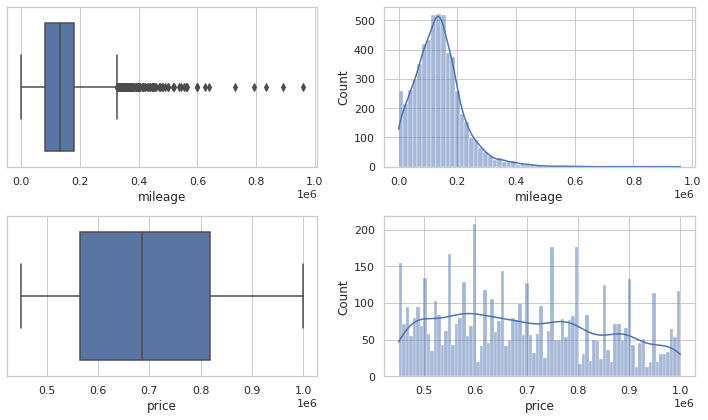

In [92]:
## The parameters for subplot are: number of rows,
## number of columns, and which subplot you're currently on.
## So 1, 2, 1 means "a 1-row, 2-column figure

figure, axes = plt.subplots(2,2, figsize=(10,6))
sns.set_theme(style="whitegrid")

plt.subplot(2,2,1)
ax = sns.boxplot(x=df.mileage)
plt.subplot(2,2,2)
sns.histplot(df.mileage, kde=True, bins = 60)

plt.subplot(2,2,3)
ax = sns.boxplot(x=df.price)
plt.subplot(2,2,4)
sns.histplot(df.price, kde=True, bins = 80)

plt.tight_layout()
plt.show()

In [93]:
out = df[(np.abs(stats.zscore(df['mileage'])) > 3)]
out1 = df[(np.abs(stats.zscore(df['price'])) > 3)]

mileageNoOut = df[~(np.abs(stats.zscore(df['mileage'])) > 3)].copy()
priceNoOut = df[~(np.abs(stats.zscore(df['price'])) > 3)].copy()

In [94]:
out.sort_values(by = ['mileage'], ascending = False).head(2)

,car,year,price,mileage,hp,vol,box,body,drive,fuel,city,location,inform,date,today,url
4301,Mercedes-Benz Sprinter,2011,950000,960000,150,2.2,MT,minibus,rear_wheel,diesel,Брянск,"Брянская область, Брянск",В салоне не курили. Летняя резина в комплекте....,2 часа назад,2021-11-23,https://www.avito.ru//bryansk/avtomobili/merce...
3061,ТагАЗ Tager,2009,499000,890000,150,2.3,MT,SUV,all_wheel,gasoline,Красноярск,"Красноярский край, Красноярск","Автосалон ""Покровский"" более 20ти лет на рынке...",2 часа назад,2021-11-23,https://www.avito.ru//krasnoyarsk/avtomobili/t...


In [29]:
len(out), len(out1), len(df.mileage), len(mileageNoOut.mileage)

(72, 0, 5656, 5584)

In [30]:
## outliers effect on mean and median
df.mileage.mean(), mileageNoOut.mileage.mean()

(137306.1481612447, 132820.55050143268)

In [31]:
df.mileage.median(), mileageNoOut.mileage.median()

(130506.0, 130000.0)

### Q6: Do gear box, body, drive and fuel affect the price of a car?:    Is There a difference between average car price with DIFFERENT gear boxes?

### ANOVA test: Categrocial and Continuous variable 
- By default we assume (NULL HYPOTHESIS) : There is NO MEAN PRICE DIFFERENCE between carswith different gear box. 
- ALTERNATIVE HYPOTHESIS - There is mean price difference between carswith different gear boxes. it is NOT VERY SPECIFIC, though, it just states "At least one pair of means are different from each other"
- If the p-value is below 0.05, we reject the null hypothesis in favor of the alternative: this means that at least one group mean is significantly different.
- F Statistic = Variability btw groups/variabilty within groups
- variation within a group (a column) SSW - Sum of Squares Within  vs variation between groups (columns) SSB -Sum of Squares Between
- more on ANOVA https://www.khanacademy.org/math/statistics-probability/analysis-of-variance-anova-library/analysis-of-variance-anova/v/anova-1-calculating-sst-total-sum-of-squares

### CONDITIONS 
- 1. Independence: WITHIN GROUPS - sampled observations must be independent, BTW GROUPS - The groups must be independent of each other (non-paired)
- 2. Approximate Normality - Distributions must be nearly normal within EACH Group 
- 3. Equal Variance - Groups should have roughly equal variability. We need Homscedastic groups - variability should be consistent across groups, this es ESPECIALLY important when sample sizes DIFFER between the groups (our case)..Check with boxplots, visually
- HOWEVER, The problem of non-normality, especially in large samples, is far less serious than popular articles would suggest (WIKIPEDIA - https://en.wikipedia.org/wiki/One-way_analysis_of_variance)

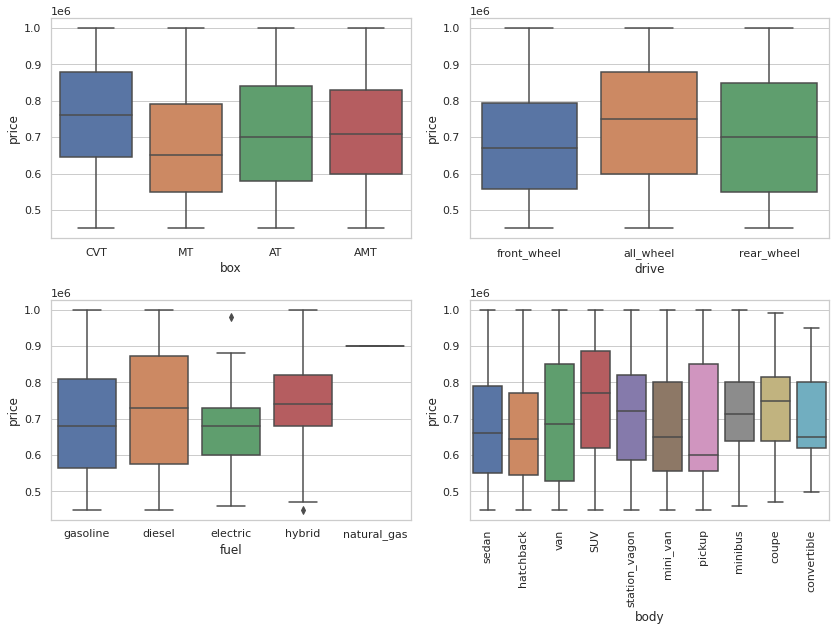

In [95]:
## CHeck for Equal Variance (Condition 3), 
## BOX : MT, A and AMT okay, CVT a little divergent
## BODY - 
## FUEL - Investigate GAZ
figure, axes = plt.subplots(2,2, figsize=(12,8))

sns.boxplot(x = 'box', y ='price', data = df, ax=axes[0,0])
sns.boxplot(x = 'drive', y ='price', data = df, ax=axes[0,1])
sns.boxplot(x = 'fuel', y ='price', data = df, ax=axes[1,0])
sns.boxplot(x = 'body', y ='price', data = df, ax=axes[1,1])

plt.tight_layout()

plt.xticks(rotation = 'vertical')
plt.show()

In [33]:
## Remove газ and электро for ANOVA
df.fuel.value_counts()

 бензин     5124
 дизель      462
 гибрид       58
 электро       9
 газ           3
Name: fuel, dtype: int64

In [34]:
df[df['fuel'].str.contains("газ")]

,car,year,price,mileage,hp,vol,box,body,drive,fuel,city,location,inform,date,today,url
4962,ВАЗ (LADA) Vesta,2021,899000,1,106,1.6,MT,седан,передний,газ,Белгород,"Белгородская область, Белгород",Автомобиль продается дилерским центром «Ррт-Ав...,2 часа назад,2021-11-23,https://www.avito.ru//belgorod/avtomobili/vaz_...
5204,ВАЗ (LADA) Vesta,2021,899000,1,106,1.6,MT,седан,передний,газ,Белгород,"Белгородская область, Белгород",Автомобиль продается дилерским центром «Ррт-Ав...,2 часа назад,2021-11-23,https://www.avito.ru//belgorod/avtomobili/vaz_...
5209,ВАЗ (LADA) Vesta,2021,899000,1,106,1.6,MT,седан,передний,газ,Белгород,"Белгородская область, Белгород",Автомобиль продается дилерским центром «Ррт-Ав...,2 часа назад,2021-11-23,https://www.avito.ru//belgorod/avtomobili/vaz_...


In [96]:
df = df[~df['fuel'].str.contains("газ")]

### Check for Normality - Distributions must be nearly normal within EACH Group

In [36]:
df.box.value_counts()

MT     2789
AT     2065
CVT     437
AMT     362
Name: box, dtype: int64

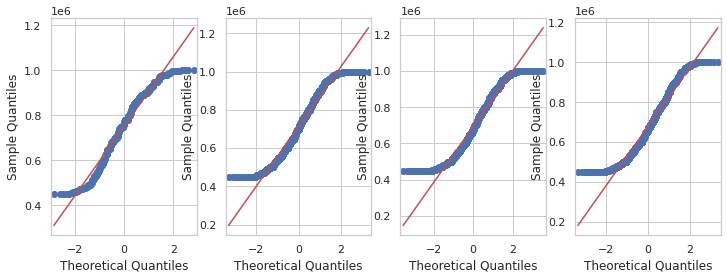

In [37]:
## We observe Divergence from normality towards the tails
plt.figure(figsize=(12,4))
ax1 = plt.subplot(1,4,1)
sm.qqplot(df.price[df.box=='CVT'], line='s', ax = ax1)
ax2 = plt.subplot(1,4,2)
sm.qqplot(df.price[df.box=='AT'], line='s', ax = ax2);
ax3 = plt.subplot(1,4,3)
sm.qqplot(df[df.fuel.str.contains ('бензин')]['price'], line='s', ax = ax3);
ax4 = plt.subplot(1,4,4)
sm.qqplot(df[df.body.str.contains ('седан')]['price'], line='s', ax = ax4);

In [38]:
# p <= alpha (0.05): reject H0: Distribution is not normal
W, p = stats.shapiro(df.price[df.box=='CVT'])

In [39]:
p

5.550173654000901e-10

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm_box = ols('price ~ box', data = df).fit()
lm_body = ols('price ~ body', data = df).fit()
lm_drive = ols('price ~ drive', data = df).fit()
lm_fuel = ols('price ~ fuel', data = df).fit()

anova_box = sm.stats.anova_lm(lm_box)
anova_body = sm.stats.anova_lm(lm_body)
anova_drive = sm.stats.anova_lm(lm_drive)
anova_fuel = sm.stats.anova_lm(lm_fuel)

In [41]:
##first row is about between group variability, 
## second row is the within group variability
anova_box

,df,sum_sq,mean_sq,F,PR(>F)
box,3.0,3.498406e+12,1.166135e+12,49.409002,1.631899e-31
Residual,5649.0,1.333259e+14,2.360167e+10,NaN,NaN


In [42]:
anova_body

,df,sum_sq,mean_sq,F,PR(>F)
body,9.0,6.743640e+12,7.492933e+11,32.504935,3.265026e-56
Residual,5643.0,1.300806e+14,2.305168e+10,NaN,NaN


In [43]:
anova_drive

,df,sum_sq,mean_sq,F,PR(>F)
drive,2.0,3.158604e+12,1.579302e+12,66.756538,2.214374e-29
Residual,5650.0,1.336657e+14,2.365764e+10,NaN,NaN


In [44]:
## F Statistic = Variability btw groups/variabilty within groups
## Observe relatively small (but significant, and relative to drive, box and body)
##  F stats 8.32. 
anova_fuel

,df,sum_sq,mean_sq,F,PR(>F)
fuel,3.0,6.020646e+11,2.006882e+11,8.322341,0.000016
Residual,5649.0,1.362222e+14,2.411439e+10,NaN,NaN


In [45]:
## CAUTION, for multiple comparisons we need Bonferroni correction, which calls
## for more stringent significance level

## We indeed see average price variance between
## cars with differnt box, small P value further confirms that
## Although certain conditions for ANOVA were not met
df.groupby('fuel')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
fuel,,,,,,,,
бензин,5124.0,693240.630757,154110.584833,450000.0,565000.0,680000.0,810000.0,1000000.0
гибрид,58.0,748948.241379,132563.777476,450000.0,680000.0,740000.0,820000.0,999999.0
дизель,462.0,725443.543290,169937.382020,450000.0,575000.0,729500.0,872250.0,1000000.0
электро,9.0,685555.555556,171690.936796,460000.0,600000.0,680000.0,730000.0,980000.0


In [46]:
df.head(1)

,car,year,price,mileage,hp,vol,box,body,drive,fuel,city,location,inform,date,today,url
0,Mitsubishi Lancer,2014,650000,100181,140,1.8,CVT,седан,передний,бензин,Москва,Москва,Прoдаю надёжный автомобиль в достойнойном тeхн...,Несколько секунд назад,2021-11-23,https://www.avito.ru//moskva/avtomobili/mitsub...


## CORRELATIONS (Pearson)
- Pearson correlation (default in Python) is a measure of the strength and direction of the linear relationship between two continuous variables. It relies on 5 key assumptions:
- 1. Data is interval or ratio. These types of continuous data are important for how correlation assumes values in variables are related. Ordinal or Categorical variable coding won’t work.
- 2. Pearson only works with linear data.
- 3. No outliers in data.
- 4. Data is normally distributed.
- 5. Data must be homoscedastic. Homoscedasticity assumes that data is equally distributed about the regression line

### Q7 - year, price, mileage relationships

In [47]:
## Whether or not year is categorical or continuous is present differently
## in different sources
df.corr()

,year,price,mileage,hp,vol
year,1.000000,0.230287,-0.565450,-0.447823,-0.477915
price,0.230287,1.000000,-0.179406,0.180980,0.096731
mileage,-0.565450,-0.179406,1.000000,0.352035,0.384152
hp,-0.447823,0.180980,0.352035,1.000000,0.814905
vol,-0.477915,0.096731,0.384152,0.814905,1.000000


<AxesSubplot:>

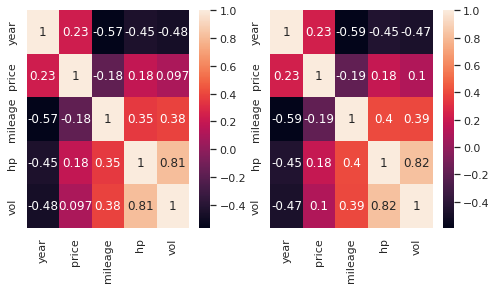

In [841]:
plt.figure(figsize=(8,4))
ax1 = plt.subplot(1,2,1)
sns.heatmap(df.corr(), annot = df.corr())
ax2 = plt.subplot(1,2,2)
sns.heatmap(mileageNoOut.corr(), annot = mileageNoOut.corr())

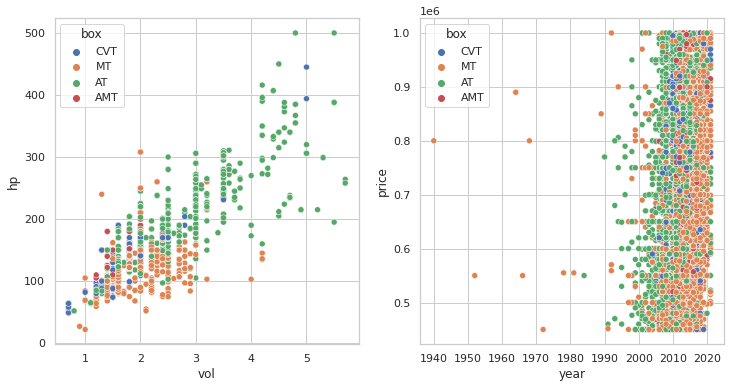

In [48]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
sns.scatterplot(x="vol", y="hp", hue='box',legend='full', data=df)
ax2 = plt.subplot(1,2,2)
sns.scatterplot(x="year", y="price", hue='box',legend='full', data=df)
plt.show()

### Q8: how likely is it for a randomly chosen car mileage to be between 60 000 and 95000 ?
- We know that cars with 100 000 km plus mileage are no good (for the sake of argument)
- the probability that a randomly chosen car mileage will be between 60 and 95 000 can be calculated as the area between the density function (graph) and the x-axis in the interval [0.06 and , 0.095 (between 0.0 and 0.2 in our plot)].
- a good guide here https://towardsdatascience.com/histograms-vs-kdes-explained-ed62e7753f12

In [97]:
# https://stackoverflow.com/questions/38711541/how-to-compute-the-probability-of-a-value-given-a-list-of-samples-from-a-distrib

from sklearn.neighbors import KernelDensity
import numpy as np
# ValueError: Expected 2D array, got 1D array instead
# convert pandas col to 2d array
X = [[x]*1 for x in df.mileage] ## this is type list
X = np.array(X) ## Convert the list to array
kd = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)

In [50]:
df.mileage.describe()

count      5653.000000
mean     137379.014859
std       84226.662386
min           1.000000
25%       82000.000000
50%      130528.000000
75%      179000.000000
max      960000.000000
Name: mileage, dtype: float64

In [98]:
# Get probability for range of values
start = 1  # Start of the range
end = 130506    # End of the range
# Number of evaluation points, the larger the better, 
# especially for large datasets like this one,
# 1- 130506 is 50 % from df.mileage.describe(), calibrate N with this
# Til get the closest to 50 Percent probability
N = 12000  
step = (end - start) / (N - 1)  # Step size
x = np.linspace(start, end, N)[:, np.newaxis]  # Generate values in the range
kd_vals = np.exp(kd.score_samples(x))  # Get PDF values for each x
probability = np.sum(kd_vals * step)  # Approximate the integral of the PDF
print(probability)

0.501585008333985


In [99]:
## ANSWER to Q1
start = 60000  
end = 95000
## Sensitivity of prob on N is less, N values 10000 and 15000
## produce same probability, while in above case for wider range
## Pro output differs depending on N size
N = 12000   
step = (end - start) / (N - 1) 
x = np.linspace(start, end, N)[:, np.newaxis]  
kd_vals = np.exp(kd.score_samples(x))  
probability1 = np.sum(kd_vals * step) 
print(probability1)

0.15607862365628505


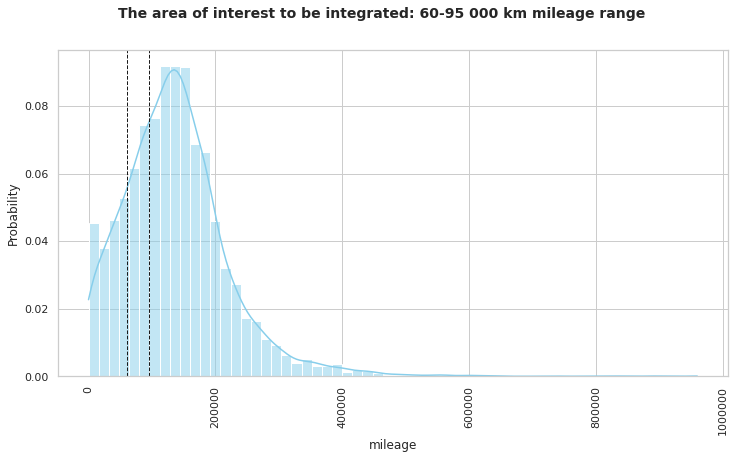

In [100]:
figure, ax = plt.subplots(figsize=(12,6))

sns.histplot(df.mileage, kde=True, bins = 60, stat = "probability",color='skyblue')


ax.ticklabel_format(style='plain', useOffset=False)
#ll = ax.get_xticks()
#x_ticks = np.append(ax.get_xticks(), 60000)
#ax.set_xticks(x_ticks)
plt.xticks(rotation='vertical')

plt.axvline(60000, color='k', linestyle='dashed', linewidth=1)
plt.axvline(95000, color='k', linestyle='dashed', linewidth=1)
figure.suptitle('The area of interest to be integrated: 60-95 000 km mileage range', 
                fontsize=14, fontweight='bold')
plt.show()

In [101]:
probability1

0.15607862365628505